<a href="https://colab.research.google.com/github/cr7yash/Activity-Recognition-from-Single-Chest-Mounted-Accelerometer/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Reading the files
filenames = ['1.csv','2.csv','3.csv','4.csv','5.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv','1.csv']

final_df = pd.DataFrame()

pId = 0
for pId, files in enumerate(filenames):
  df = pd.read_csv(files, index_col=None, header=None)
  df['User ID'] = pId + 1 
  final_df= final_df.append(df)

del final_df[0]
final_df.columns = ['X-acceleration', 'Y-acceleration', 'Z-acceleration', 'Activity ID', 'User ID']

In [3]:

#Basic information about the dataset
print("Dataset Info: ")
print(final_df.info())
print("Dataset Description: ")
print(final_df.iloc[:, 0:3].describe())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310055 entries, 0 to 162500
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   X-acceleration  int64
 1   Y-acceleration  int64
 2   Z-acceleration  int64
 3   Activity ID     int64
 4   User ID         int64
dtypes: int64(5)
memory usage: 105.7 MB
None
Dataset Description: 
       X-acceleration  Y-acceleration  Z-acceleration
count    2.310055e+06    2.310055e+06    2.310055e+06
mean     1.929663e+03    2.374221e+03    2.022799e+03
std      6.744604e+01    4.783067e+01    7.403733e+01
min      1.094000e+03    2.000000e+00    2.000000e+00
25%      1.890000e+03    2.364000e+03    1.983000e+03
50%      1.910000e+03    2.379000e+03    2.009000e+03
75%      1.963000e+03    2.385000e+03    2.080000e+03
max      3.625000e+03    4.094000e+03    4.094000e+03


In [4]:
#Number of activities performed by each user 
activityPerUser = final_df['Activity ID'].value_counts()
print("Activity Per User :")
print(activityPerUser)
totalCountOfActivity = activityPerUser.sum()
print(totalCountOfActivity)

Activity Per User :
7    1088689
1     518792
4     393585
3     185562
5      48413
6      45377
2      29353
0        284
Name: Activity ID, dtype: int64
2310055


# Data Exploration

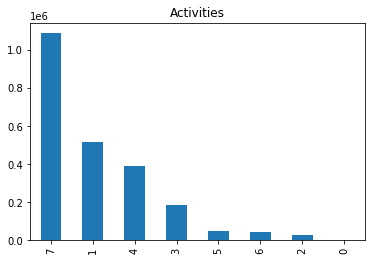

In [5]:
person = final_df.iloc[:, -2].value_counts()
person.plot(kind = 'bar', title = "Activities");

**Note**:
From the above bar graph it is evedent that Activity numbers 1, 7 and 4 i.e. working at computers, Talking while standing and walking are the most frequently done activities. Moreover, Activity 1 (Working at computers) is the most done activity which indicates that all the respondents have a job which requires to work on computers. Furthermore, other frequently done activities like 7 and 4 indicate that our respondents care about their fitness.

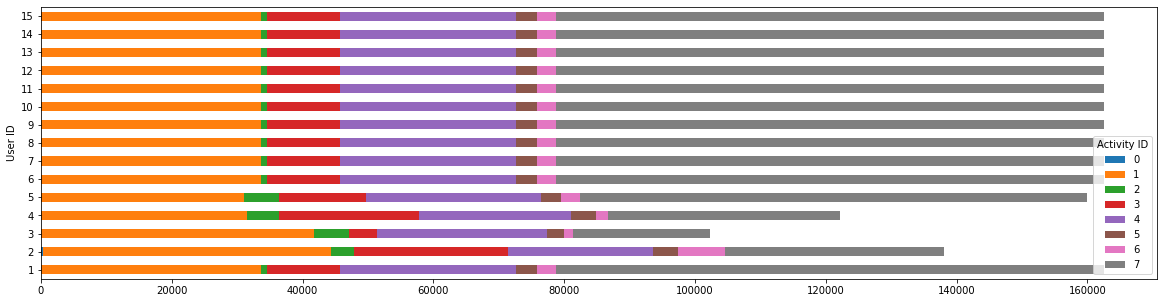

In [7]:
test = pd.crosstab(index=final_df.iloc[:, -1], columns=final_df.iloc[:, -2])
test.plot(kind = "barh", stacked = True, figsize = (20, 5));

**Observations**:
From the above bar chart we can clearly make out the amount of work each respondent does. From the chart, respondent 3 does most ofthe work on computers; whereas respondent number 5 does the least. Also respondent number 2, 8, 12 and 14 perform activity number 6. Therefore, we can assume these respondents as fitness freaks. Furthermore, respondent number 5 spends a very less time in all the activities, hence we can assume that respondent number 5 is not that active as compared to the other respondents or may be the respondent is aged (old) when comparerd to other respondents.

# Activities

The Following explorations give information about the x, y and z accelerations trends with respect to the activities. For all the 7 activities we have plotted a subplot; giving information about the accelerations per activity.

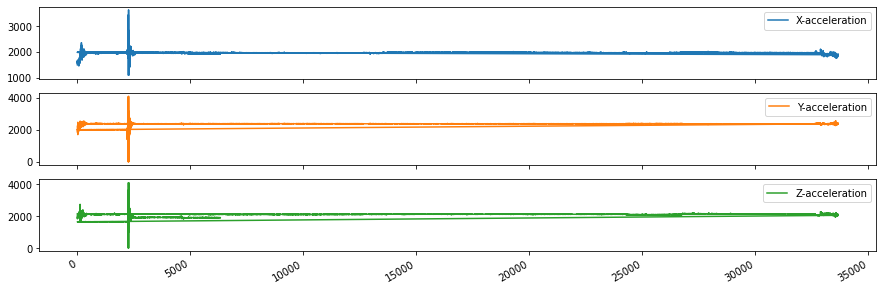

In [8]:
# Working at Computers 
expOne = final_df[final_df['Activity ID'] == 1]
expOne = expOne[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expOne = expOne[:40000]
axOne = expOne.plot(subplots = True, figsize = (15, 5))

**Observations**:
From the above exploration, we can clearly see some large movements at the beginning. This unusal behaviour may be because of the presence of the outliers, The reason for such unusual behaviour could be the instability of the accelerometer which placing it or switching on. Also working with computers requires no sort of major movemet, which can be clearly seen ahead in the plot.

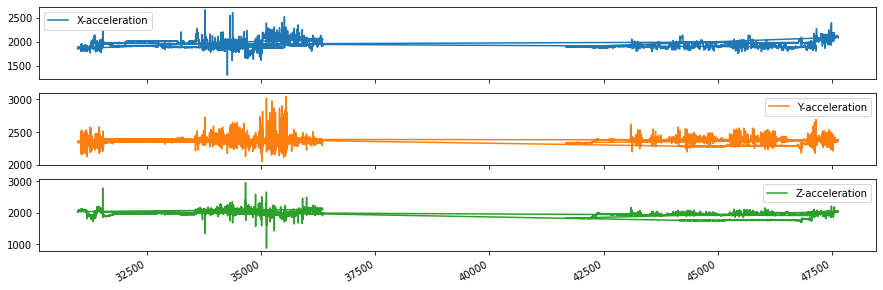

In [9]:
# Standing Up, Walking and going up down stairs 
expTwo = final_df[final_df['Activity ID'] == 2]
expTwo = expTwo[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expTwo = expTwo[:40000]
axTwo = expTwo.plot(subplots = True, figsize = (15, 5))

**Observations**:
From the above exploration we can see no movement in the begning which clearly indicates that the respondents are standing up at that particular moment. Furthermore spikes at some point in the plot indicate some kind of movement i.e. at that moment it is possible that the respondent is doing some tasks which require some kind of a movement (walking, going up or down the stairs).

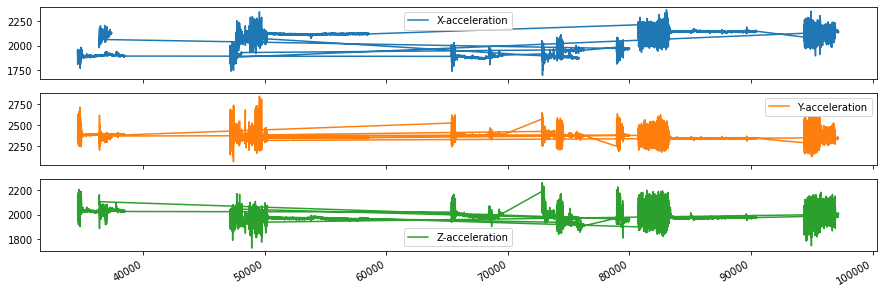

In [10]:
#Standing
expThree = final_df[final_df['Activity ID'] == 3]
expThree = expThree[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expThree = expThree[:40000]
axThree = expThree.plot(subplots = True, figsize=(15, 5))

**Observations**:¶
From the above graph we can clearly see some movement, these movements are considerable because a person can not stand still all the time. Moreover, in the begning, we can spot some unusual behaviour. These unusual patterns can be caused because of the presence of the outliers in the dataset. These outliers can be removed to make the dataset look more uniform and normal.



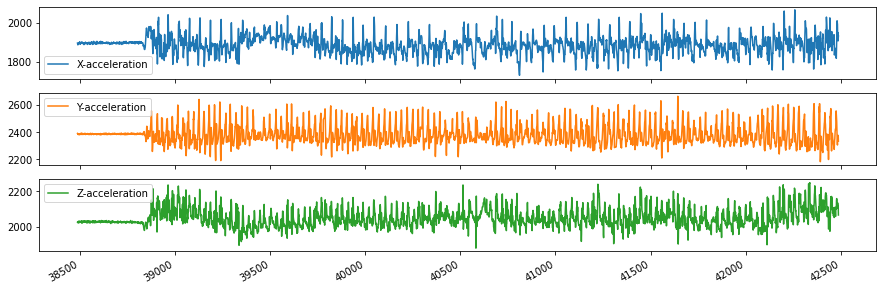

In [11]:
# Walking
expFour = final_df[final_df['Activity ID'] == 4]
expFour = expFour[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expFour = expFour[:4000]
axFour  = expFour.plot(subplots = True, figsize=(15, 5))

**Observations**:
From the above plot we can see a constant movement in the plot, which is normal because walking requires constant movement of the body. Also, further the speed of the respondent can be observed i.e. when the respondent walks fast the x, y and z coordinates will show some rapid changes. Hence, other than activity speed of the respondent can also be determined using this data.

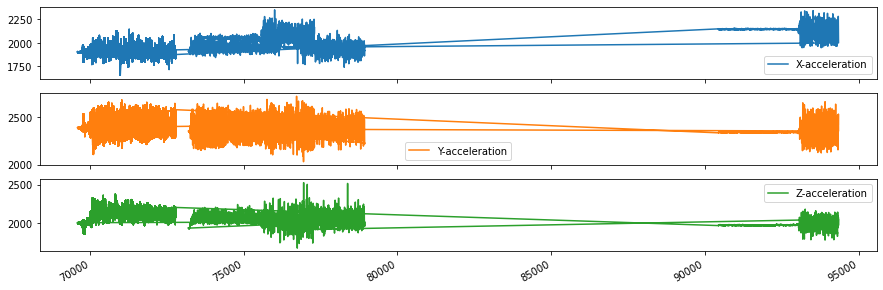

In [12]:
# Going UP Down Stairs
expFive = final_df[final_df['Activity ID'] == 5]
expFive = expFive[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expFive = expFive[:40000]
axFive  = expFive.plot(subplots = True, figsize=(15, 5))

**Observations**:
From the above plot we can clearly figure out some kind of a movement or work done i.e. Going up Down Stairs. Somewhere in the middle we can observe a constant movement, this constant movement may be caused while going down the stairs as going down the stairs do not require much of work; whereas some rapid fluctuation can also be seen, these rapid fluctuation can be caused while going up the stairs as going up requires more.

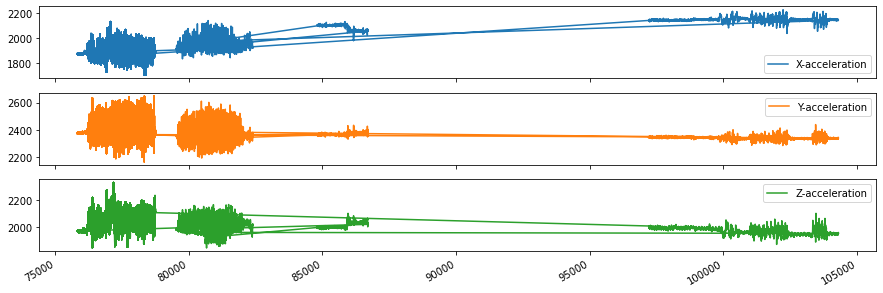

In [13]:
# Walking and talking with someone
expSix = final_df[final_df['Activity ID'] == 6]
expSix = expSix[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expSix = expSix[:40000]
axSix  = expSix.plot(subplots = True, figsize=(15, 5))

**Note**:
from the above plot we can clearly see some smooth linear line and some spikes. These smooth linear lines indicate that respondent is talking or is a conversation with some one; and the spikes indicates some sort of a movement i.e. walking or talking on phone while walking. Also, in the middle the speed of the respondents can also be observed i.e. an instant fluctuation in the graph indicates that the respondents have increased their speed while walking. The contribution to the fluctuation is not solely because of the speed; talking can also contribute as our body vibrates while talking. Therefore, assuming that walking only causes the fluctuation will be a wrong assumption.

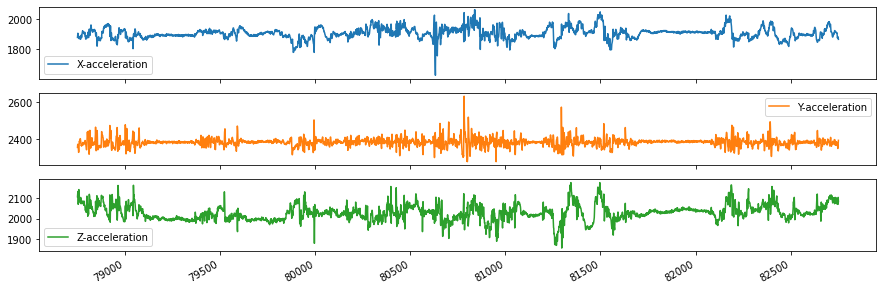

In [14]:
#Talking while standing
expSeven = final_df[final_df['Activity ID'] == 7]
expSeven = expSeven[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expSeven = expSeven[:4000]
axSeven  = expSeven.plot(subplots = True, figsize = (15, 5))

Note:
from the above graph we can see some movement which is very obvious because standing still is not possible all the time. Also, while talking our body produces some vibrations, these vibrations can also have a contribution in the movement of the accelerometer.



# Data Modelling

Splitting the data into train and test set
To split the dataset into training and test set we need to select the features based on which our model is going to predict the labeled values(target variables). These features are also called independent varaibles and the target variables are termed as dependent variabels. Mostly, we keep 70% of the data in the training phase and rest 30% in the test phase. The more the model gets the data to train, the better prediction will be done.

In [15]:
from sklearn.model_selection import train_test_split #importing train_test_split library from sklearn
x = final_df.iloc[:, 0:3] #Features (Independent Variables)
y = final_df.iloc[:, -2] #Target Variables (Dependent Variables)
#Splitting the data into train and test, keeping 70% in train and rest 30% in test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30) 
print("X Train:\n", x_train.head(3), "\n")
print("Y Train:\n", y_train.head(3), "\n")
print("X Test (Unseen Data):\n", x_test.head(3), "\n")
print("Y Test (Unseen Data):\n", y_test.head(3), "\n")

X Train:
         X-acceleration  Y-acceleration  Z-acceleration
91543             1891            2390            1994
140286            1906            2390            1969
101956            1904            2389            2007 

Y Train:
 91543     7
140286    7
101956    7
Name: Activity ID, dtype: int64 

X Test (Unseen Data):
         X-acceleration  Y-acceleration  Z-acceleration
119916            1891            2383            2000
49998             2040            2310            1992
634               1881            2347            1973 

Y Test (Unseen Data):
 119916    7
49998     4
634       1
Name: Activity ID, dtype: int64 



**Decision tree classifier**

A decision tree is a representation used for classification, where the dataset is split based on different conditions. For this dataset, we choose to use this type of classification, where we split the data based on some parameter. Also, we intend tune the parameters so that we can use those parameter and get a good accuracy score for the choosen dataset. Furthermore, Kfold cross validation and stratified shuffel split cross validation are used

**Feature** Selection using Hill Climbing : 


In [16]:
from sklearn.utils import shuffle 
from sklearn.tree import DecisionTreeClassifier as dtc

new_Index = []
MaxScore = 0.0
columnNum = 3
randomIndex = shuffle(range(0,columnNum), random_state=0)


for i in range(0, columnNum):
    new_Index.append(randomIndex[i])
    newData = final_df.iloc[:, new_Index]
    X_train, X_test, Y_train, Y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    classifier = dtc(criterion = 'gini', max_depth = 15)
    fit = classifier.fit(X_train, Y_train)
    cur_Score = classifier.score(X_test, Y_test)
    if cur_Score < MaxScore:
        new_Index.remove(randomIndex[i])
    else:
        MaxScore = cur_Score
        print("Score with " + str(len(new_Index)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.6455170980777514
Score with 2 selected features: 0.7784533268688408
Score with 3 selected features: 0.8468575423528877


Note:
From the hill climbing technique it is clearly seen that choosing 3 features it will give us a better result. Therefore we will use all the 3 given features(i.e. X-Acceleration, Y-Acceleration and Z-Acceleration) for the Decision Tree Classifier

**Selecting the parameters for the Decision Tree Classifier (Tuning the parameters manually)**


 Criterion : Gini

Accuracy for criterion GINI and Max_depth = 2  is  68.2248776004052 %
Accuracy for criterion GINI and Max_depth = 3  is  72.76906627110158 %
Accuracy for criterion GINI and Max_depth = 4  is  73.56774797732236 %
Accuracy for criterion GINI and Max_depth = 5  is  76.46940839835098 %
Accuracy for criterion GINI and Max_depth = 6  is  77.6070428286752 %
Accuracy for criterion GINI and Max_depth = 7  is  78.79215084189853 %
Accuracy for criterion GINI and Max_depth = 8  is  80.07639062245227 %
Accuracy for criterion GINI and Max_depth = 9  is  81.44533250988071 %
Accuracy for criterion GINI and Max_depth = 10  is  82.13102997473366 %
Accuracy for criterion GINI and Max_depth = 11  is  82.63909831937745 %
Accuracy for criterion GINI and Max_depth = 12  is  83.2177277036494 %
Accuracy for criterion GINI and Max_depth = 13  is  83.69405079529074 %
Accuracy for criterion GINI and Max_depth = 14  is  84.254354510784 %
Accuracy for criterion GINI and Max_depth = 15  is  84.73

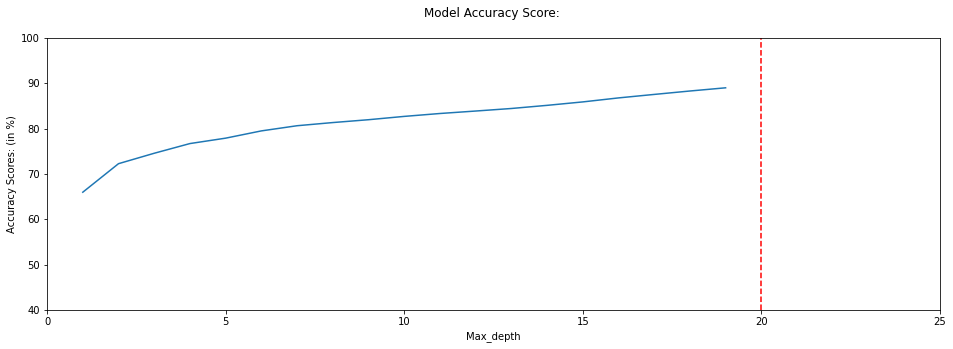

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
accur = []
accur2 = []
val = 0
val2 = 0
print("\n Criterion : Gini\n")
for i in range(1, 20):
    k = i+1
    decisionTreeClassifier = dtc(criterion = 'gini', max_depth = k)
    decisionTreeClassifier.fit(x_train, y_train)
    y_predict = decisionTreeClassifier.predict(x_test)
    a = acc(y_test, y_predict)*100
    if a > val:
        val = a
        ind = k
    accur.append(a)
    print("Accuracy for criterion GINI and Max_depth =", k, " is ", a, "%")

print("\nCriterion : Entropy \n")
for i in range(1, 20):
    k = i+1
    decisionTreeClassifier = dtc(criterion = 'entropy', max_depth = k)
    decisionTreeClassifier.fit(x_train, y_train)
    y_predict = decisionTreeClassifier.predict(x_test)
    a = acc(y_test, y_predict)*100
    if a > val2:
        val2 = a
        ind = k
    accur2.append(a)
    print("Accuracy for criterion ENTROPY and Max_depth =", k, " is ", a, "%")
    
print("\n")
if max(accur) > max(accur2):
    print("Criterion selected as GINI and max depth", ind, "will give us an accuracy score of ", max(accur))
    plt.figure(figsize=(16,5))
    plt.title("Model Accuracy Score: \n")
    plt.ylabel("Accuracy Scores: (in %)")
    plt.ylim(40, 100)
    plt.xlim(0, 25)
    plt.xlabel("Max_depth")
    plt.plot(range(1, 20), accur)
    plt.vlines(ind, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors = 'red');
else:
    print("Criterion selected as ENTROPY and max depth", ind, "will give us an accuracy score of ", max(accur2))
    plt.figure(figsize=(16,5))
    plt.title("Model Accuracy Score: \n")
    plt.ylabel("Accuracy Scores: (in %)")
    plt.ylim(40, 100)
    plt.xlim(0, 25)
    plt.xlabel("Max_depth")
    plt.plot(range(1, 20), accur2)
    plt.vlines(ind, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors = 'red');

**Decision Tree Classifier using the best parameters (Calculated Above)**

In [18]:
from sklearn.tree import DecisionTreeClassifier as dtc #importing Decision tree classifier from sklearn
from sklearn.metrics import classification_report as cr # classification report
from sklearn import metrics #importing metrics library to calculate the accuracy of the classifier model 
from sklearn.metrics import confusion_matrix

decision_tree = dtc(criterion = 'gini', max_depth = 15) #Normal decision tree will "Default Parameters"
decision_tree.fit(x_train, y_train) #fitting the x train and y train set into the decision tree model 
y_predicted = decision_tree.predict(x_test)

Accuracy Score for Normal Decision Tree Classifier:  84.73832532246684
Classification Report for Normal Decision Tree :


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       precision    recall  f1-score   support

                                    0      0.000     0.000     0.000        86
                  Working at computer      0.945     0.953     0.949    155702
Standing up, Walking and going updown      0.527     0.191     0.281      8881
                             Standing      0.633     0.430     0.512     55697
                              Walking      0.774     0.832     0.802    117832
                  Going upDown stairs      0.750     0.379     0.503     14742
                  Walking and talking      0.627     0.189     0.291     13578
               Talking While Standing      0.861     0.940     0.899    326499

                             accuracy                          0.847    693017
                            macro avg      0.639     0.489     0.530    693017
                         weighted avg      0.835     0.847     0.834    693017

Confusion Matrix:
[[     0      0      0      0  

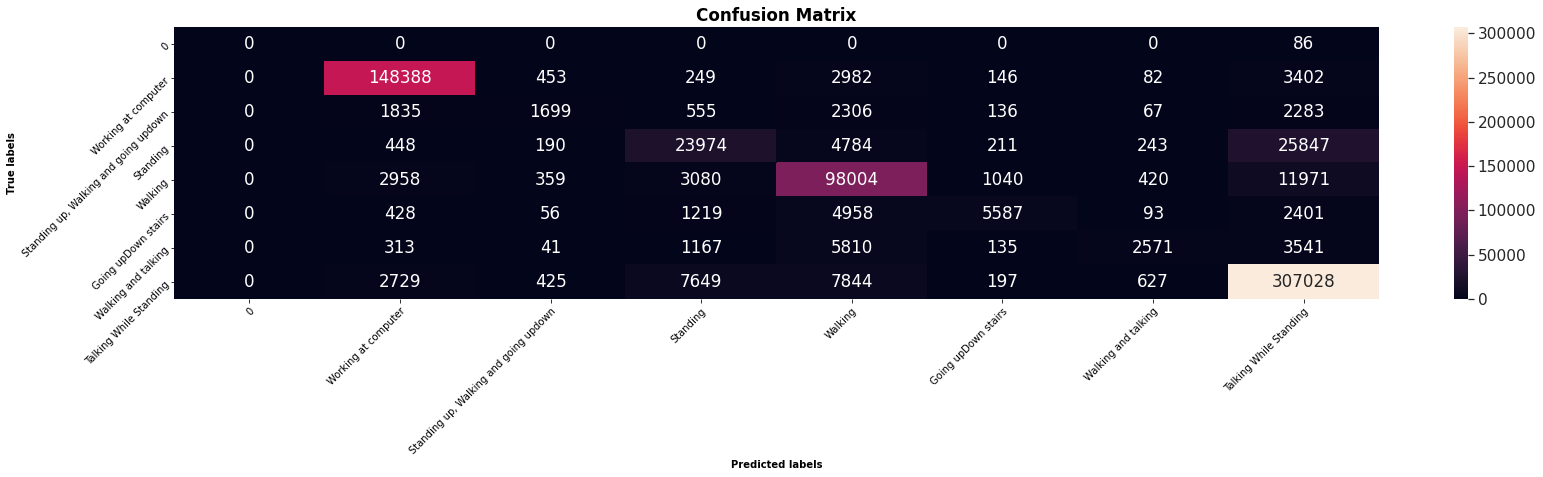

In [19]:
#Accuracy Score for the above trained decision tree classifier with default parameter
print('Accuracy Score for Normal Decision Tree Classifier: ', (metrics.accuracy_score(y_test, y_predicted)*100))
#Printing the classification report for the normal decision tree
print("Classification Report for Normal Decision Tree :")
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
print(cr(y_test, y_predicted, digits = 3, target_names=target_names))
#Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(cm, "\n")

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("Visualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation= 45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

Decision Tree With Kfold Cross Validation:


Kfold cross validation, the data is divided into folds. Each fold is has specific amount of data to train and test. once the training and testing are performed, we then simultaniously check the accuracy score for each validation dataset.

In [20]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import cross_val_predict as cvp

decision_model = dtc() 
k_fold = kf(n_splits = 25, random_state = 0)
#Decision Tree Model is trained on the entire dataset
accuracyScores = cvs(decision_model, x, y, cv = k_fold) 
#Predicting the target values using the modified decision tree model on the unseen data
pred = cvp(decision_model, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean accuracy for the Decision Tree Classifier(Cross Validation Score):  0.8293635853394089
Classification Report for Decision Tree(KFold Cross Validation) :
                                       precision    recall  f1-score   support

                                    0      0.056     0.070     0.062        86
                  Working at computer      0.967     0.961     0.964    155702
Standing up, Walking and going updown      0.521     0.484     0.502      8881
                             Standing      0.687     0.672     0.679     55697
                              Walking      0.882     0.876     0.879    117832
                  Going upDown stairs      0.722     0.725     0.724     14742
                  Walking and talking      0.680     0.710     0.695     13578
               Talking While Standing      0.928     0.937     0.933    326499

                             accuracy                          0.896    693017
                            macro avg      0.681  

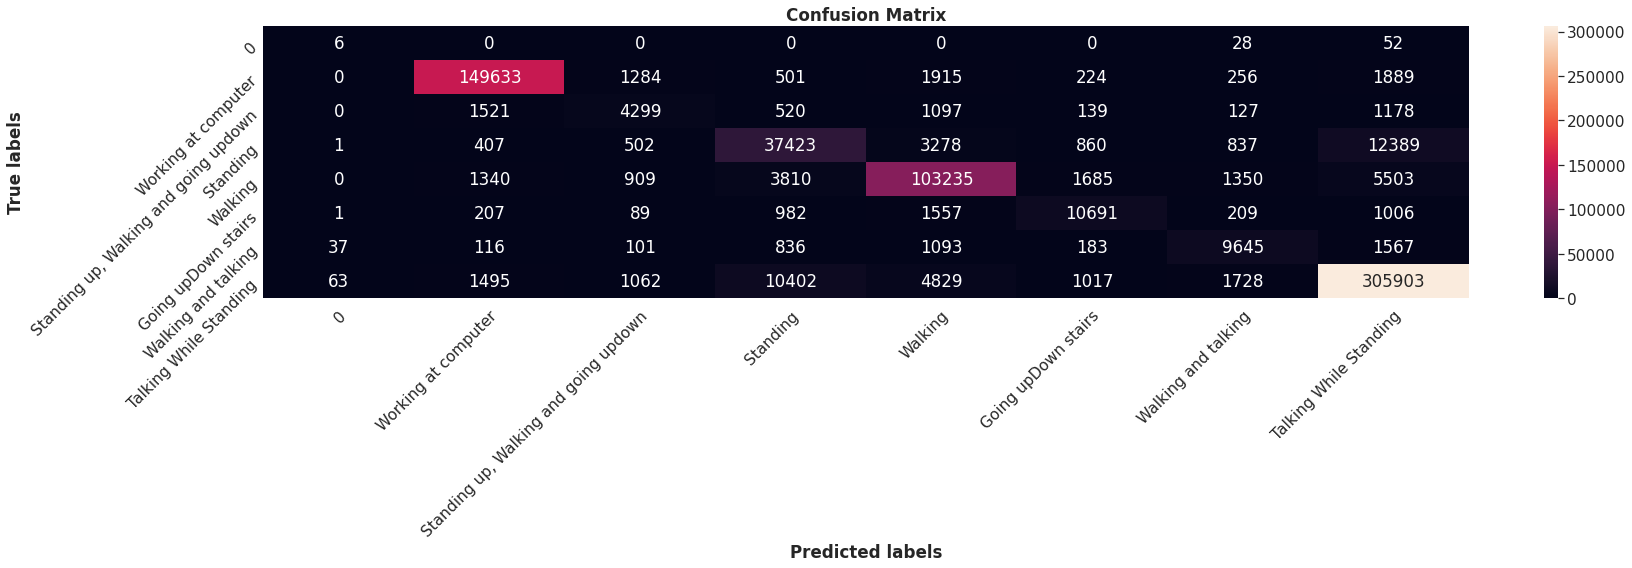

In [21]:
#Accuracy Score for tha above trained decision tree classifier
print("Mean accuracy for the Decision Tree Classifier(Cross Validation Score): ", accuracyScores.mean())
#Printing the classification report
print("Classification Report for Decision Tree(KFold Cross Validation) :")
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
print(cr(y_test, pred, digits = 3, target_names=target_names))
#Confusion Matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

**Note**:

The reason for such low accuracy result is the uneven distribution of the target variables(Activities). In the dataset the activity numbers 7 and 1 are the most frequently done activities but in the dataset there are many activities which are not done very often. Therefore, in some folds it is possible that such activities donot exist, hence affecting our accuracy result. However, in the normal decision tree we have the same number of target distribution but the number of instances(data) are more which is an obvious reason for the good cross validation score.

**Decision Tree With KFold Cross Validation (Shuffle)**

This cross validation is a version of KFold itself. The only difference is that in this we shuffle the dataset randomly.the whole data is first shuffled and then split into the K-Folds. Keeping the shuffle equals to true will maintain the homogenity throughout the dataset. Also this will increase the cross validation score of the model.

In [22]:
ShuffK_fold = kf(n_splits = 25, random_state = 0, shuffle = True)
accuracyScores1 = cvs(decision_model, x, y, cv = ShuffK_fold) 
Strat_pred = cvp(dtc(), x_test, y_test)

Accuracy Score for Normal Decision Tree Classifier:  0.9048429588140179
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0      0.056     0.070     0.062        86
           1      0.967     0.961     0.964    155702
           2      0.521     0.486     0.503      8881
           3      0.688     0.672     0.680     55697
           4      0.882     0.876     0.879    117832
           5      0.723     0.725     0.724     14742
           6      0.684     0.710     0.697     13578
           7      0.928     0.937     0.933    326499

    accuracy                          0.896    693017
   macro avg      0.681     0.680     0.680    693017
weighted avg      0.895     0.896     0.896    693017

Confusion Matrix:
 [[     6      0      0      0      0      1     27     52]
 [     0 149646   1295    480   1936    228    241   1876]
 [     0   1520   4319    516   1089    146    111   1180]
 [     2    415    511  37415   3306    

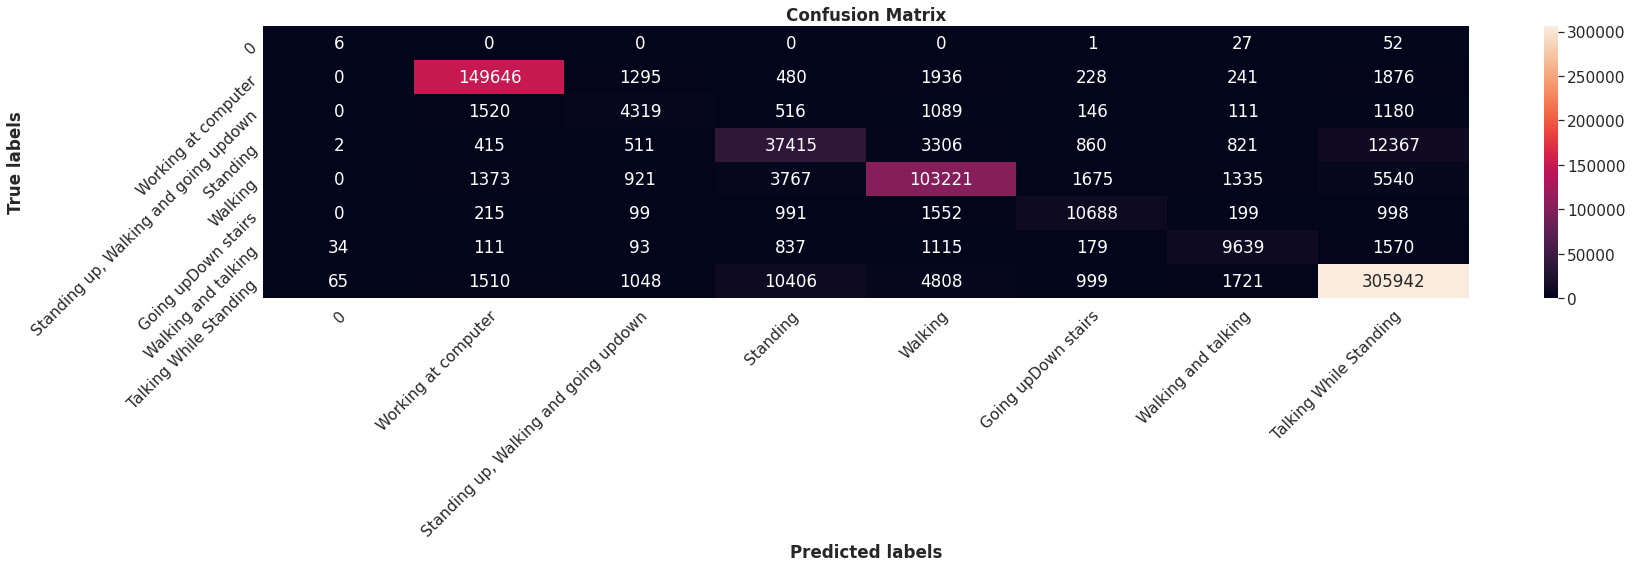

In [23]:
#Accuracy Score for tha above trained decision tree classifier
print("Accuracy Score for Normal Decision Tree Classifier: ", accuracyScores1.mean())
#Printing the classification report
print("Classification Report for Decision Tree:")
print(cr(y_test, Strat_pred, digits = 3))
#Confusion Matrix
cm = confusion_matrix(y_test, Strat_pred)
print("Confusion Matrix:\n", cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

# KNN (KNearst Neighbor) Classifier:

KNN(KNearst Neighbor) is a non-parametric method used for classification. Such type of classification method are based on feature similarity. With this dataset, we intend to run a normal KNN and check the accuracy for it. Furthermore, we will also do a KFold cross validation.

**Feature Selection using Hill Climbing :**

In [26]:
from sklearn.utils import shuffle 
from sklearn.neighbors import KNeighborsClassifier as knc

new_Index = []
MaxScore = 0.0
columnNum = 3
randomIndex = shuffle(range(0,columnNum), random_state=0)


for i in range(0, columnNum):
    new_Index.append(randomIndex[i])
    newData = final_df.iloc[:, new_Index]
    X_train, X_test, Y_train, Y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    classifier = knc(5)
    fit = classifier.fit(X_train, Y_train)
    cur_Score = classifier.score(X_test, Y_test)
    if cur_Score < MaxScore:
        new_Index.remove(randomIndex[i])
    else:
        MaxScore = cur_Score
        print("Score with " + str(len(new_Index)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.5874632855061892
Score with 2 selected features: 0.774896052258496
Score with 3 selected features: 0.9154846962518208


**Note**:

From the hill climbing technique it is clearly seen that choosing 3 features it will give us a better result. Therefore we will use all the 3 given features(i.e. X-Acceleration, Y-Acceleration and Z-Acceleration) for the KNN Classifier.

**Finding the optimum number of neighbours for the KNN Model**

Accuracy is  90.03083618439375 % for k value :  2
Accuracy is  91.30656246527863 % for k value :  3
Accuracy is  91.37452616602478 % for k value :  4
Accuracy is  91.65864618039673 % for k value :  5
Accuracy is  91.61997469037556 % for k value :  6
Accuracy is  91.73945227894842 % for k value :  7
Accuracy is  91.53570547331451 % for k value :  8
Accuracy is  91.45562085778559 % for k value :  9
Accuracy is  90.95072703844205 % for k value :  10
Accuracy is  90.51697144514492 % for k value :  11
Accuracy is  89.62420835275326 % for k value :  12
Accuracy is  88.80734527435835 % for k value :  13
Accuracy is  87.71458708805123 % for k value :  14
Accuracy is  86.87579092576372 % for k value :  15
Accuracy is  86.15834820790832 % for k value :  16
Accuracy is  85.69890781900011 % for k value :  17
Accuracy is  85.4592311588316 % for k value :  18
Accuracy is  85.43138191415218 % for k value :  19
Accuracy is  85.45042906595364 % for k value :  20
Accuracy is  85.4854931408609 % for k va

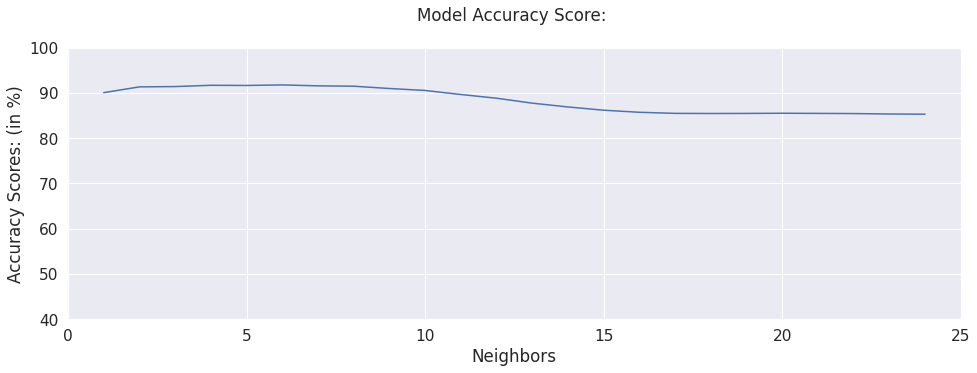

In [27]:
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
accur = []
optimum = 0
val3 = 0
for i in range(1, 25):
    k = i+1
    neighbors = knc(n_neighbors = k)
    neighbors.fit(x_train, y_train)
    y_predict = neighbors.predict(x_test)
    a = acc(y_test, y_predict)*100
    accur.append(a)
    if a > val3:
        val3 = a
        optimum = k
    print("Accuracy is ", a, "% for k value : ", k)

print("\n The optimum number of neighbors for this dataset is ", optimum)


plt.figure(figsize=(16,5))
plt.title("Model Accuracy Score: \n")
plt.ylabel("Accuracy Scores: (in %)")
plt.ylim(40, 100)
plt.xlim(0, 25)
plt.xlabel("Neighbors")
plt.plot(range(1, 25), accur)

**Note**:

Clearly, selecting a large value of k(neighnors) can lead to underfitting , similarly, selecting the small value of k can lead to overfitting. Therefore there is no such way to find a best value for k(neighbor).

**KNN model using the optimum number of neighbors (Calculated Above)**

In [28]:
# Importing KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier as knc 

knnModel = knc(25)
#Fitting the training and test set 
knnModel_1 = knnModel.fit(x_train, y_train) 
y_pred = knnModel_1.predict(x_test)

Accuracy Score for Normal KNN:  0.8527467580160372


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.94      0.95      0.95    155702
           2       0.52      0.21      0.30      8881
           3       0.66      0.52      0.58     55697
           4       0.77      0.84      0.80    117832
           5       0.59      0.37      0.46     14742
           6       0.50      0.21      0.29     13578
           7       0.88      0.93      0.91    326499

    accuracy                           0.85    693017
   macro avg       0.61      0.50      0.54    693017
weighted avg       0.84      0.85      0.84    693017

Confusion Matrix:
 [[     0      0      0      0      0      0      5     81]
 [     0 148441    445    323   3102    323    169   2899]
 [     0   1747   1878    505   2238    214     94   2205]
 [     0    429    241  28786   5259    506    394  20082]
 [     0   2897    434   2839  98579   1685    935  10463]
 [     0  

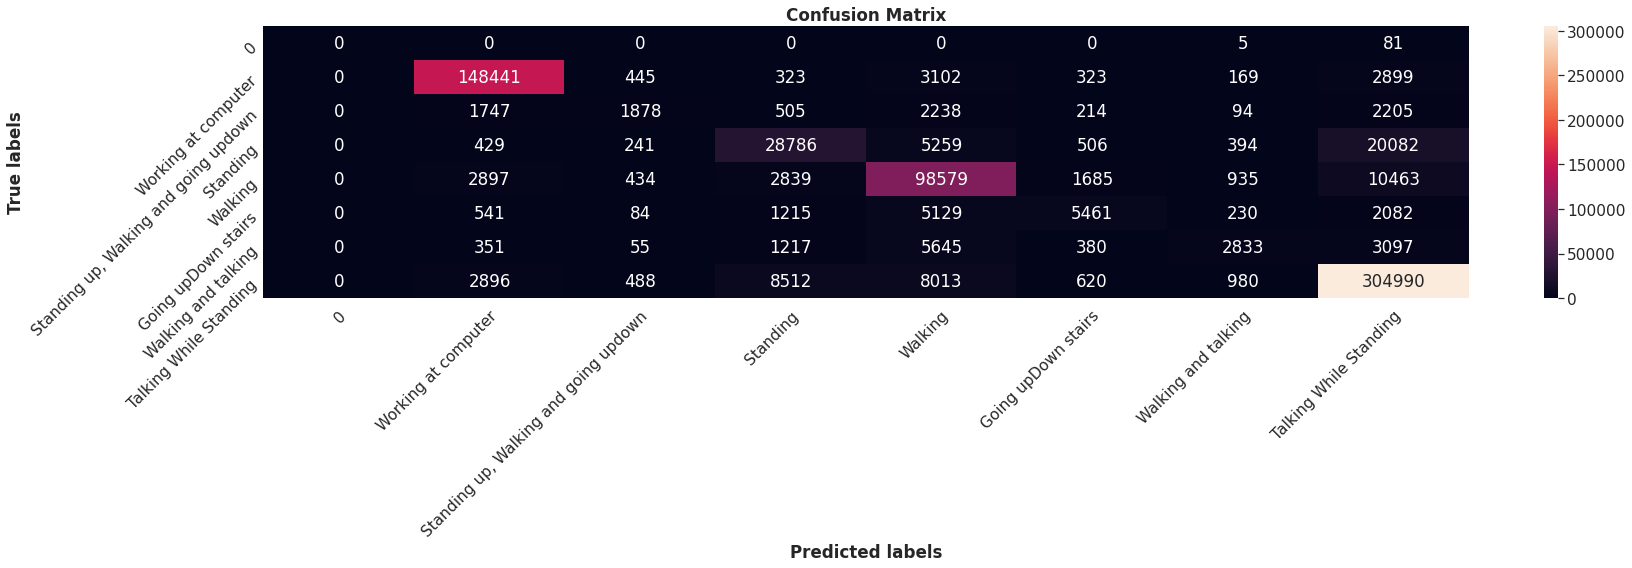

In [29]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score

print("Accuracy Score for Normal KNN: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Report: \n", cr(y_test, y_pred))
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

# KNN with KFold Cross Validation


In [30]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.neighbors import KNeighborsClassifier as knc 
from sklearn.model_selection import cross_val_predict as cvp

Knn = knc() 
k_fold = kf(n_splits = 25, random_state = 0)
#KNN is trained on the entire dataset
accuracyScores = cvs(Knn, x, y, cv = k_fold) 
#Predicting the target values using the modified KNN model on the unseen data
pred = cvp(Knn, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean accuracy for the KNN Classifier(Cross Validation Score):  0.8355266284463956
Classification Report for KNN(KFold Cross Validation) :
              precision    recall  f1-score   support

           0      0.205     0.093     0.128        86
           1      0.947     0.954     0.950    155702
           2      0.491     0.339     0.401      8881
           3      0.630     0.594     0.612     55697
           4      0.805     0.831     0.817    117832
           5      0.619     0.514     0.562     14742
           6      0.539     0.437     0.483     13578
           7      0.903     0.920     0.911    326499

    accuracy                          0.860    693017
   macro avg      0.642     0.585     0.608    693017
weighted avg      0.856     0.860     0.858    693017

Confusion Matrix:
[[     8      0      0      0      0      0     17     61]
 [     0 148500    765    427   2847    322    243   2598]
 [     0   1679   3007    571   1659    168     99   1698]
 [     1    509 

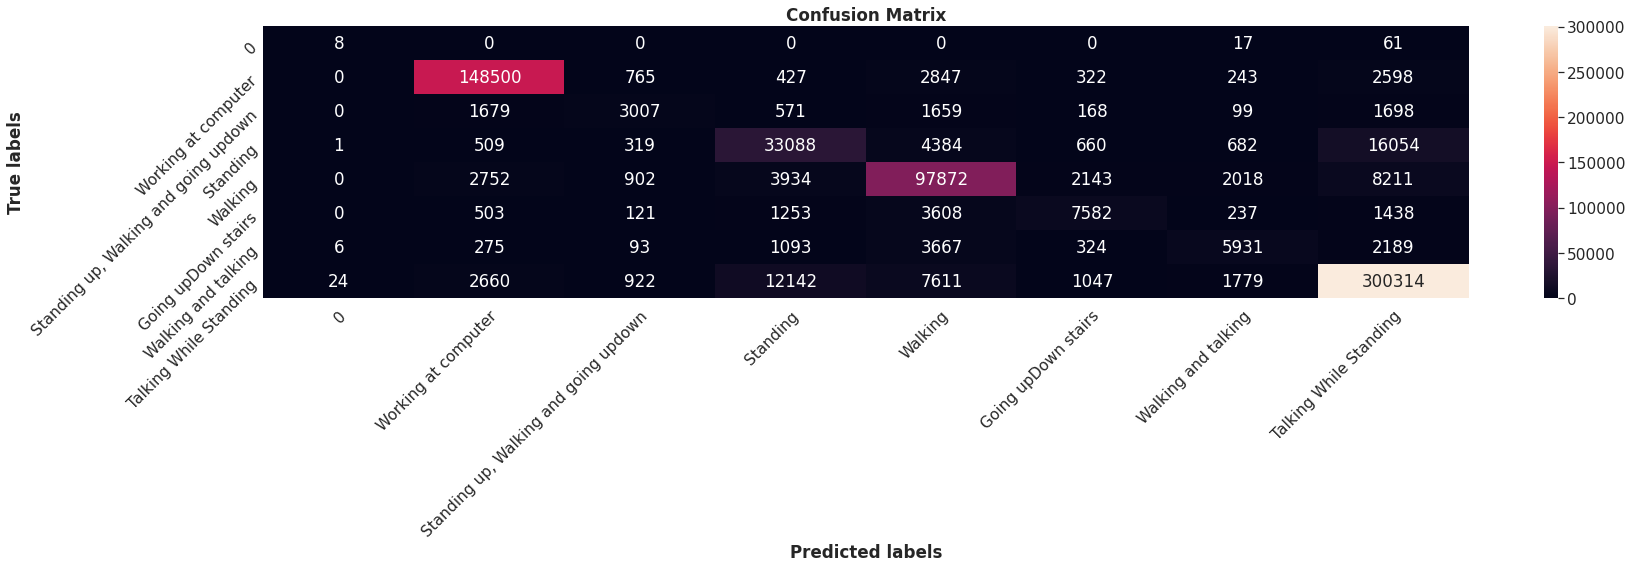

In [31]:
#Accuracy Score for tha above trained KNN classifier
print("Mean accuracy for the KNN Classifier(Cross Validation Score): ", accuracyScores.mean())
#Printing the classification report
print("Classification Report for KNN(KFold Cross Validation) :")
print(cr(y_test, pred, digits = 3))
#Confusion Matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

# **Conclusion**:

From the above classification models, it is evident that KNN (K-Nearst Neighbor) has the best accuracy overall i.e. 72%; whereas the accuracy score for the decision tree is somewhere around 65%. Therefore, for the "Activity Recognition from Single Chest-Mounted Accelerometer" dataset KNN classification model can be consdered to recognise the given activity. However, in the dataset, there were a lot of ambiguty, which had to be mitigated.